# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\chapm\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
load_dotenv()
API = os.getenv("API")

In [3]:
# Create a newsapi client
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=API)

In [4]:
# Fetch the Bitcoin news articles
btc_news = newsapi.get_everything(
    q="bitcoin",
    language="en"
)

In [5]:
# Fetch the Ethereum news articles
eth_news = newsapi.get_everything(
    q="ethereum",
    language="en"
)

In [6]:
# Create the Bitcoin sentiment scores DataFrame
analyzer = SentimentIntensityAnalyzer()

btc_sentiments = []

for article in btc_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        btc_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
btc_df = pd.DataFrame(btc_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
btc_df = btc_df[cols]

btc_df.head()

,date,text,compound,positive,negative,neutral
0,2021-10-06,"<ul><li>Bitcoin, in terms of market value, ros...",0.3400,0.076,0.000,0.924
1,2021-11-05,A similar hoax earlier this year tied Walmart ...,-0.2732,0.000,0.063,0.937
2,2021-10-06,How high are the chances of Bitcoin sustaining...,0.4939,0.219,0.000,0.781
3,2021-10-10,"Specifically, why did someone make a massive p...",0.5461,0.121,0.000,0.879
4,2021-10-28,Theres a big new presence slurping up power fr...,0.3612,0.096,0.000,0.904


In [7]:
# Create the Ethereum sentiment scores DataFrame
eth_sentiments = []

for article in eth_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
eth_df = pd.DataFrame(eth_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
eth_df = eth_df[cols]

eth_df.head()

,date,text,compound,positive,negative,neutral
0,2021-10-16,A new cross-chain bridge is currently connecte...,0.0000,0.000,0.0,1.000
1,2021-10-14,Mark Cuban has some advice for people who are ...,0.0000,0.000,0.0,1.000
2,2021-11-05,Ethereum and bitcoin are the two biggest crypt...,0.4588,0.094,0.0,0.906
3,2021-11-01,Elon Musk\r\npicture alliance / Getty Images\r...,0.5267,0.093,0.0,0.907
4,2021-11-01,Cryptocurrency and business continuity line im...,0.4588,0.097,0.0,0.903


In [9]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.258495,0.075000,0.003150,0.921850
std,0.294239,0.076982,0.014087,0.075015
min,-0.273200,0.000000,0.000000,0.781000
25%,0.000000,0.000000,0.000000,0.874250
50%,0.318000,0.070000,0.000000,0.930000
75%,0.502100,0.125750,0.000000,1.000000
max,0.755800,0.219000,0.063000,1.000000


In [10]:
# Describe the Ethereum Sentiment
eth_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.206370,0.044350,0.002400,0.953250
std,0.297927,0.066664,0.010733,0.071224
min,0.000000,0.000000,0.000000,0.792000
25%,0.000000,0.000000,0.000000,0.905250
50%,0.000000,0.000000,0.000000,1.000000
75%,0.475775,0.094750,0.000000,1.000000
max,0.822500,0.208000,0.048000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin

Q: Which coin had the highest compound score?

A: Ethereum

Q. Which coin had the highest positive score?

A: Bitcoin

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [11]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer() 

# Create a list of stopwords
sw = stopwords.words('english')

# Expand the default stopwords list if necessary
# YOUR CODE HERE!

In [12]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""    
    # Remove the punctuation from text
    pattern = re.compile("[^a-zA-Z ]")
    re_clean = pattern.sub('', text)
   
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]

    # Convert the words to lowercase
    # Remove the stop words

    tokens = [word.lower() for word in lem if word.lower() not in sw]    
    
    return tokens

In [13]:
# Create a new tokens column for Bitcoin
tokens = [tokenizer(btc_df.text[i]) for i in btc_df.text.index]
btc_df["tokens"] = tokens
btc_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2021-10-06,"<ul><li>Bitcoin, in terms of market value, ros...",0.3400,0.076,0.000,0.924,"[ullibitcoin, term, market, value, rose, lilii..."
1,2021-10-04,JPMorgan CEO Jamie Dimon is still not a Bitcoi...,-0.2411,0.000,0.116,0.884,"[jpmorgan, ceo, jamie, dimon, still, bitcoin, ..."
2,2021-10-06,How high are the chances of Bitcoin sustaining...,0.4939,0.219,0.000,0.781,"[high, chance, bitcoin, sustaining, gain, push..."
3,2021-10-10,"Specifically, why did someone make a massive p...",0.5461,0.121,0.000,0.879,"[specifically, someone, make, massive, purchas..."
4,2021-10-28,Theres a big new presence slurping up power fr...,0.3612,0.096,0.000,0.904,"[theres, big, new, presence, slurping, power, ..."


In [14]:
# Create a new tokens column for Ethereum
tokens = [tokenizer(eth_df.text[i]) for i in eth_df.text.index]
eth_df["tokens"] = tokens
eth_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2021-10-16,A new cross-chain bridge is currently connecte...,0.0000,0.000,0.0,1.000,"[new, crosschain, bridge, currently, connected..."
1,2021-10-14,Mark Cuban has some advice for people who are ...,0.0000,0.000,0.0,1.000,"[mark, cuban, ha, advice, people, new, investi..."
2,2021-11-01,Elon Musk\r\npicture alliance / Getty Images\r...,0.5267,0.093,0.0,0.907,"[elon, muskpicture, alliance, getty, imagesa, ..."
3,2021-11-01,Cryptocurrency and business continuity line im...,0.4588,0.097,0.0,0.903,"[cryptocurrency, business, continuity, line, i..."
4,2021-10-11,"An immersive art installation, which will be c...",0.0000,0.000,0.0,1.000,"[immersive, art, installation, converted, nfts..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [ ]:
from collections import Counter
from nltk import ngrams

In [37]:
# Generate the Bitcoin N-grams where N=2
btc_bigram_counts = []
for i in range(0, len(btc_df)):    
    btc_bigram_counts.append(Counter(ngrams(btc_df.tokens[i], n=2)))

In [38]:
# Generate the Ethereum N-grams where N=2
eth_bigram_counts = []
for i in range(0, len(eth_df)):    
    eth_bigram_counts.append(Counter(ngrams(eth_df.tokens[i], n=2)))

In [ ]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [ ]:
# Use token_count to get the top 10 words for Bitcoin
btc_words = [word for sublist in btc_df.tokens for word in sublist]
token_count(btc_words, 10)

In [ ]:
# Use token_count to get the top 10 words for Ethereum
eth_words = [word for sublist in eth_df.tokens for word in sublist]
token_count(eth_words, 10)

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

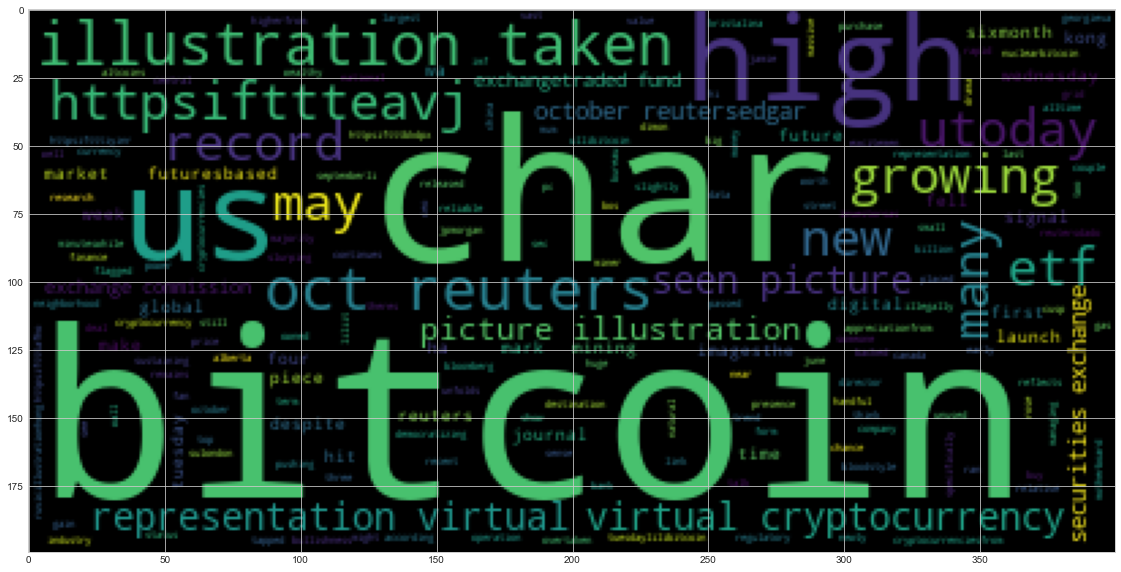

In [44]:
# Generate the Bitcoin word cloud
wc_btc = WordCloud().generate(" ".join(btc_words))
plt.imshow(wc_btc)

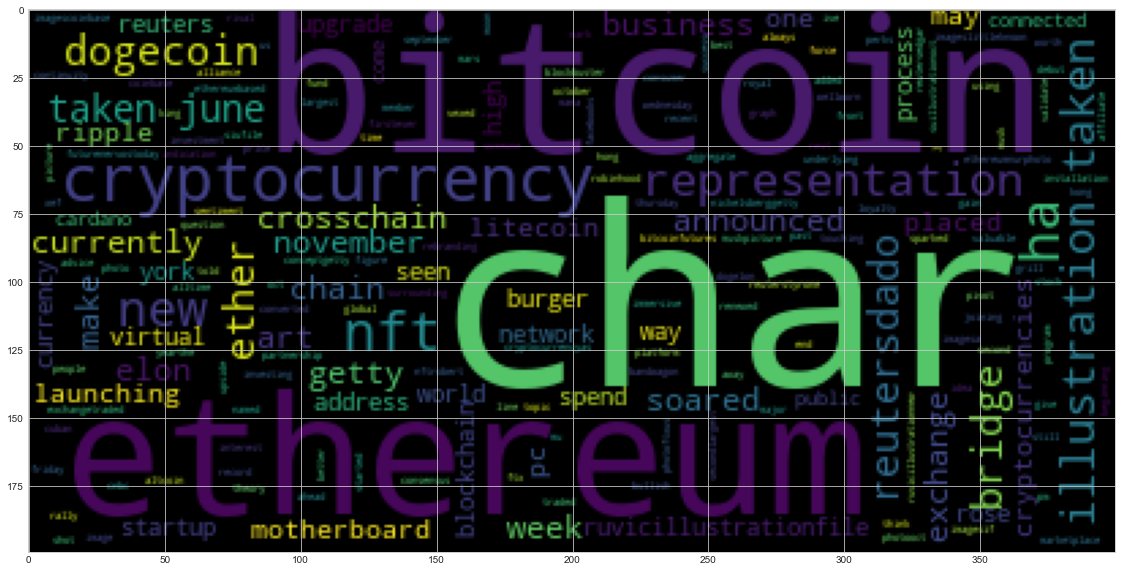

In [45]:
# Generate the Ethereum word cloud
wc_eth = WordCloud().generate(" ".join(eth_words))
plt.imshow(wc_eth)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [46]:
import spacy
from spacy import displacy

In [25]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [47]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [50]:
# Concatenate all of the Bitcoin text together
btc_text = " ".join(btc_df.text)


In [51]:
# Run the NER processor on all of the text
doc = nlp(btc_text)

# Add a title to the document
# YOUR CODE HERE!

In [52]:
# Render the visualization
displacy.render(doc, style='ent') 

In [53]:
# List all Entities
for ent in doc.ents:
    print(ent.text, ent.label_)

4.6% PERCENT
53,859.6.</li><li MONEY
50,000 MONEY
first ORDINAL
four weeks DATE
Tuesday DATE
50,000 MONEY
JPMorgan ORG
Jamie Dimon PERSON
$1.6 billion MONEY
Wednesday DATE
a couple of minutes TIME
U.S. GPE
U.S. GPE
China GPE
Last week DATE
the Wall Street Journal ORG
three CARDINAL
Journal ORG
Bitcoin ORG
Bloomberg ORG
the National Bureau ORG
SEC ORG
two CARDINAL
Digital ORG
IMF ORG
Kristalina Georgieva PERSON
Canada GPE
Bitcoin NORP
Alberta GPE
Link Global PERSON
June 29, 2021 DATE
REUTERS ORG
Dado Ruvic/IllustrationHONG KONG ORG
Oct 21 DATE
Reuters ORG
October 19, 2021 DATE
REUTERS ORG
Edgar SuLONDON PERSON
Oct 20 DATE
Reuters ORG
Securities and Exchange Commission ORG
Andrew Kelly PERSON
The US Securities and Exchange Commission ORG
as many as four CARDINAL
October DATE
October 18, 2021 DATE
REUTERS ORG
Edgar SuSINGAPORE PERSON
Oct 19 DATE
Reuters ORG
six-month DATE
October 19, 2021 DATE
REUTERS ORG
Edgar SuHONG KONG PERSON
Oct 20 DATE
Reuters ORG
Wednesday DATE
first ORDINAL
U.S. G

---

### Ethereum NER

In [56]:
# Concatenate all of the Ethereum text together
eth_text = " ".join(eth_df.text)


In [58]:
# Run the NER processor on all of the text
doc = nlp(eth_text)

# Add a title to the document

In [59]:
# Render the visualization
displacy.render(doc, style='ent') 

In [60]:
# List all Entities
for ent in doc.ents:
    print(ent.text, ent.label_)

Ethereum PERSON
Cardano PERSON
Nervos  PERSON
today DATE
the Force Bridge FAC
Mark Cuban PERSON
CNBC ORG
Wednesday DATE
Elon Musk PERSON
Getty Images ORG
Elon Musk PERSON
3,780% PERCENT
October DATE
Dogelon Mars PRODUCT
0.00000229 MONEY
November 1 DATE
0.0 MONEY
Getty Images ORG
the past week DATE
Hong Kong GPE
September 30, 2021 DATE
FTX ORG
NFT ORG
Robert Nickelsberg PERSON
Getty Images ORG
Coinbase Global PERSON
NFT ORG
the end of the year DATE
US GPE
NurPhoto PERSON
first ORDINAL
June 29, 2021 DATE
REUTERS ORG
Dado Ruvic/Illustration/File Photo MU ORG
Burger King ORG
Robinhood GPE
Bitcoin , Ethereum and Dogecoin ORG
Royal Perks ORG
5 MONEY
June 29, 2021 DATE
REUTERS ORG
Dado Ruvic PERSON
Oct PERSON
second ORDINAL
4,400 MONEY
Friday DATE
Ethereum PERSON
Bitcoin’s ORG
second ORDINAL
June 14, 2021 DATE
REUTERS ORG
Edgar Su/IllustrationOct PERSON
Reuters ORG
7.11% PERCENT
55,162.92 MONEY
20 CARDINAL
November 19, 2020 DATE
REUTERS ORG
Dado Ruvic/Illustration/File PhotoOct ORG
Reuters OR

---